# Galaxy Photometry Demo


In [1]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

from castor_etc.telescope import Telescope
from castor_etc.background import Background
from castor_etc.sources import Profiles, ExtendedSource, PointSource, GalaxySource
from castor_etc.photometry import Photometry

from castor_etc import photometry as phot
import importlib
importlib.reload(phot)


<module 'castor_etc.photometry' from '/arc/home/IsaacCheng/CASTOR/ETC/castor_etc/photometry.py'>

In [2]:
MyTelescope = Telescope()
MyBackground = Background()
print(MyBackground.calc_mags_per_sq_arcsec(MyTelescope))

{'uv': 28.201743690413984, 'u': 24.241057364077655, 'g': 22.588133257221507}


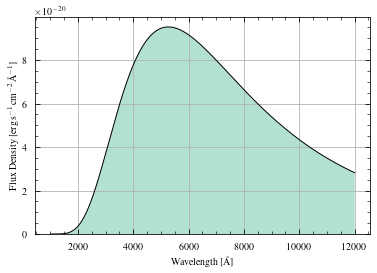

{'uv': 30.618015723816775, 'u': 27.978699999999996, 'g': 26.81083968202058}
27.070700681885405
INFO: Point source encircled energy = 74.30%
INFO: Note that, while these weights are useful in visualizing the point source, changing the source weights for a point source will not affect the final photometry calculation.
      Instead, set the `encircled_energy` parameter in the `calc_snr_or_t()` method to affect the signal-to-noise or integration time calculations.
      You can silence this message by setting `quiet=True`.


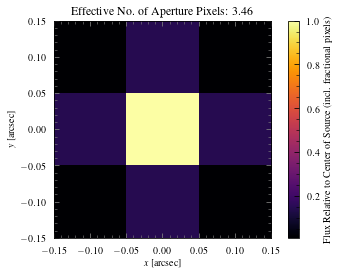

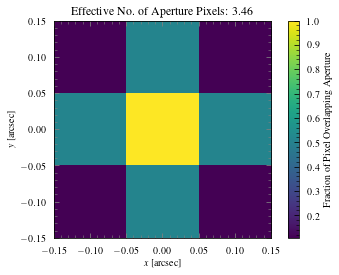

{'uv': 172806.9654535526, 'u': 3764.5306033941542, 'g': 825.6830960057199}


In [3]:
%matplotlib inline
importlib.reload(phot)
MyTelescope = Telescope(dark_current=0.01)

MyBackground = Background(mags_per_sq_arcsec={"uv": 26.08, "u": 23.74, "g": 22.60})
# MyBackground = Background()
# print(MyBackground.calc_mags_per_sq_arcsec(MyTelescope))

MySource = PointSource()
# MySource = PointSource(flux_profile)
# wavelengths = np.arange(100, 12000, 0.1) * u.nm
# spectrum = np.zeros(len(wavelengths))
# MySource.set_spectrum(wavelengths=wavelengths, spectrum=spectrum, unit="STmag")
# MySource.generate_uniform(wavelengths, 0, "ABmag")
MySource.generate_bb(5500)
# MySource.norm_to_AB_mag(28.0, "u", MyTelescope)
MySource.norm_to_AB_mag(27.9787, "u", MyTelescope)
# MySource.norm_to_AB_mag(18.141592654)
# MySource.norm_luminosity_dist(1, 10*u.kpc)
MySource.show_spectrum()

# from castor_etc.conversions import convert_AB_ST_mag, flam_to_fnu
# fig, ax = plt.subplots()
# ax.plot(wavelengths.to(u.AA), convert_AB_ST_mag(0, wavelengths, to="ABmag"))
# plt.show()

# myspectrum = np.copy(MySource.spectrum)
# myspectrum = flam_to_fnu(myspectrum, wavelengths)[0]
# myspectrum = -2.5 * np.log10(myspectrum) - 48.60  # convert to ABmag
# fig, ax = plt.subplots()
# ax.plot(wavelengths.to(u.AA), myspectrum)
# plt.show()

print(MySource.get_AB_mag(MyTelescope))
print(MySource.get_AB_mag())

MyPhot = phot.Photometry(MyTelescope, MySource, MyBackground)
# * Compare factor = 1.3 vs. 1.4 vs. vs. 1.5 vs. 1.6 (1.5 is slightly closer to min than 1.4)
MyPhot.use_optimal_aperture(factor=1.4)
# MyPhot.use_elliptical_aperture(a=0.7*MyTelescope.fwhm, b=0.7*MyTelescope.fwhm, center=[1, 0] * MyTelescope.fwhm)
# MyPhot.use_rectangular_aperture(a=0.7*MyTelescope.fwhm, b=0.7*MyTelescope.fwhm, center=[12, 0] * MyTelescope.fwhm)
MyPhot.show_source_weights()
MyPhot.show_aper_weights()
time = MyPhot.calc_snr_or_t(snr=5, reddening=0, quiet=True, include_redleak=True)
print(time)

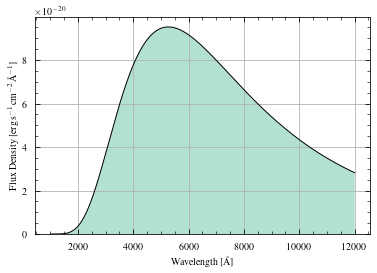

{'uv': 30.618015723816775, 'u': 27.978699999999996, 'g': 26.81083968202058}
27.070700681885405
INFO: Point source encircled energy = 74.30%
INFO: Note that, while these weights are useful in visualizing the point source, changing the source weights for a point source will not affect the final photometry calculation.
      Instead, set the `encircled_energy` parameter in the `calc_snr_or_t()` method to affect the signal-to-noise or integration time calculations.
      You can silence this message by setting `quiet=True`.


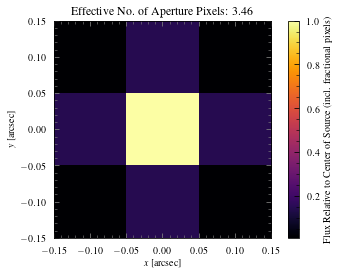

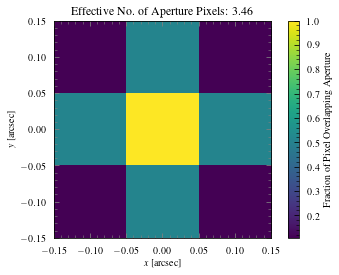

{'uv': 42210.95693086847, 'u': 2867.741037019087, 'g': 761.0782883671378}


In [4]:
importlib.reload(phot)
MyTelescope = Telescope(dark_current=0.00)

MyBackground = Background(mags_per_sq_arcsec={"uv": 26.08, "u": 23.74, "g": 22.60})
# MyBackground = Background()
# print(MyBackground.calc_mags_per_sq_arcsec(MyTelescope))

MySource = PointSource()
# wavelengths = np.arange(100, 12000, 0.1) * u.nm
# MySource.generate_uniform(wavelengths, 28, "ABmag")
MySource.generate_bb(5500)
MySource.norm_to_AB_mag(27.9787, "u", MyTelescope)
# MySource.norm_to_AB_mag(18.141592654)
# MySource.norm_luminosity_dist(1, 10*u.kpc)
MySource.show_spectrum()

# from castor_etc.conversions import convert_AB_ST_mag, flam_to_fnu
# fig, ax = plt.subplots()
# ax.plot(wavelengths.to(u.AA), convert_AB_ST_mag(0, wavelengths, to="ABmag"))
# plt.show()

# myspectrum = np.copy(MySource.spectrum)
# myspectrum = flam_to_fnu(myspectrum, wavelengths)[0]
# myspectrum = -2.5 * np.log10(myspectrum) - 48.60  # convert to ABmag
# fig, ax = plt.subplots()
# ax.plot(wavelengths.to(u.AA), myspectrum)
# plt.show()

print(MySource.get_AB_mag(MyTelescope))
print(MySource.get_AB_mag())

MyPhot = phot.Photometry(MyTelescope, MySource, MyBackground)
# * Compare factor = 1.3 vs. 1.4 vs. vs. 1.5 vs. 1.6 (1.5 is slightly closer to min than 1.4)
MyPhot.use_optimal_aperture(factor=1.4)
# MyPhot.use_elliptical_aperture(a=0.7*MyTelescope.fwhm, b=0.7*MyTelescope.fwhm, center=[0, 0] * u.arcsec)
# MyPhot.use_rectangular_aperture(a=0.7*MyTelescope.fwhm, b=0.7*MyTelescope.fwhm, center=[12, 0] * MyTelescope.fwhm)
MyPhot.show_source_weights()
MyPhot.show_aper_weights()
time = MyPhot.calc_snr_or_t(snr=5, reddening=0, quiet=True, include_redleak=True)
print(time)


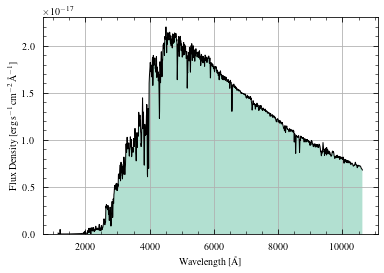

INFO: Point source encircled energy = 74.30%
INFO: Note that, while these weights are useful in visualizing the point source, changing the source weights for a point source will not affect the final photometry calculation.
      Instead, set the `encircled_energy` parameter in the `calc_snr_or_t()` method to affect the signal-to-noise or integration time calculations.
      You can silence this message by setting `quiet=True`.


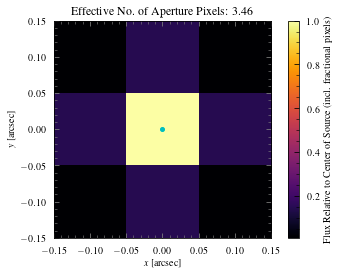

Time (s) required to reach SNR=100 in uv-band 81638.50845230816
SNR achieved in t=81638.50845230816 seconds in uv-band 99.99999999999999

Time (s) required to reach SNR=100 in u-band 2086.7471839047
SNR achieved in t=2086.7471839047 seconds in u-band 100.00000000000001

Time (s) required to reach SNR=100 in g-band 424.0164717923544
SNR achieved in t=424.0164717923544 seconds in g-band 100.00000000000001



In [5]:
importlib.reload(phot)
# %matplotlib widget
#
# Define telescope instance
#
MyTelescope = Telescope()
#
# Generate background object
#
MyBackground = Background(mags_per_sq_arcsec={"uv": 26.08, "u": 23.74, "g": 22.60})
MyBackground.add_geocoronal_emission(flux="avg")
#
# Create source
#
MySource = PointSource()
# MySource.use_pickles_spectrum("o9v")
MySource.use_pickles_spectrum("g2v")
MySource.norm_to_AB_mag(26, passband="uv", TelescopeObj=MyTelescope)
MySource.show_spectrum()

MyPhot = phot.Photometry(MyTelescope, MySource, MyBackground)
MyPhot.use_optimal_aperture()
MyPhot.show_source_weights(mark_source=True)

TARGET_SNR = 100

# (By default, returns a dictionary with the passbands as the keys)
# times = MyPhot.calc_snr_or_t(snr=TARGET_SNR)
# print(f"Time (s) required to reach SNR={TARGET_SNR} in each passband:", times)

# (For prettier printing)
for band in MyTelescope.passbands:
    time = MyPhot.calc_snr_or_t(snr=TARGET_SNR, reddening=0, quiet=True)[band]
    print(f"Time (s) required to reach SNR={TARGET_SNR} in {band}-band", time)
    snr = MyPhot.calc_snr_or_t(t=time, reddening=0, quiet=True)[band]
    print(f"SNR achieved in t={time} seconds in {band}-band", snr)
    print()

center [0. 0.]
px_scale_x, px_scale_y, center_px 1.0 3.0 [0. 0.]
Source AB mags {'uv': 18.838903364745583, 'u': 17.965353701283554, 'g': 16.693436264225703}
Source bolometric AB mag 16.539338823566105
center [ 1. -3.]
px_scale_x, px_scale_y, center_px 0.09999999999999964 0.09999999999999964 [ 10. -30.]


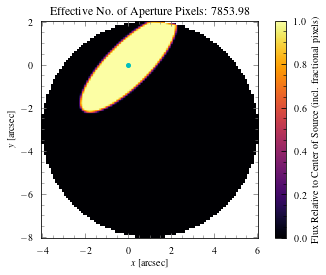

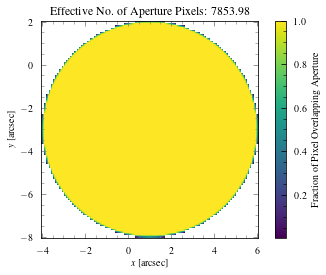

Time (s) required to reach SNR=10 in uv-band 11.368439046008792
SNR achieved in t=11.368439046008792 seconds in uv-band 10.0

Time (s) required to reach SNR=10 in u-band 4.752677659497155
SNR achieved in t=4.752677659497155 seconds in u-band 9.999999999999998

Time (s) required to reach SNR=10 in g-band 1.1517904398570304
SNR achieved in t=1.1517904398570304 seconds in g-band 10.0



In [6]:
importlib.reload(phot)
# %matplotlib widget
import matplotlib as mpl

#
# Define telescope instance
#
MyTelescope = Telescope(passband_resolution=1 << u.AA)
#
# Generate background object
#
MyBackground = Background(mags_per_sq_arcsec={"uv": 26.08, "u": 23.74, "g": 22.60})
MyBackground.add_geocoronal_emission(flux="avg")
#
# Create source
#
# flux_profile = Profiles.sersic(r_eff=2 * u.arcsec, n=1, e=0.4, angle=0)
MySource = ExtendedSource(
    # angle_a=3 * u.arcsec, angle_b=2.8 * u.arcsec, rotation=90, profile="exponential", exponential_scale_lengths=[1.5, 0.7] << u.arcsec
    angle_a=3 * u.arcsec, angle_b=1 * u.arcsec, rotation=45, profile="uniform"
)
# MySource = GalaxySource(r_eff=2*u.arcsec, n=1, angle_a=3 * u.arcsec, angle_b=2.8 * u.arcsec, rotation=90)
# MySource = GalaxySource(r_eff=2*u.arcsec, n=1, angle_a=2 * u.arcsec, angle_b=1.8 * u.arcsec, rotation=90)
#
# Renormalize & apply redshift
#
MySource.use_galaxy_spectrum(gal_type="spiral")
MySource.norm_luminosity_dist(luminosity=1.4e9, dist=58.3 * u.Mpc)  # (solar luminosities)
MySource.redshift_wavelengths(0.06)
print("Source AB mags", MySource.get_AB_mag(MyTelescope))
print("Source bolometric AB mag", MySource.get_AB_mag())
#
# Specify photometry aperture
#
MyPhot = phot.Photometry(MyTelescope, MySource, MyBackground)
MyPhot.use_elliptical_aperture(
    # a=2 * u.arcsec, b=2 * u.arcsec, center=[-2, -2] * u.arcsec, rotation=90
    a=5 * u.arcsec,
    b=5 * u.arcsec,
    center=[1, -3] * u.arcsec,
    rotation=0
    # a=2 * u.arcsec, b=1 * u.arcsec, center=[-2, -1] * u.arcsec, rotation=0
)
# MyPhot.use_rectangular_aperture(width=2.12 * u.arcsec, length=1.8 * u.arcsec, center=[0, 0] * u.arcsec)
#
# Visualize aperture
#
# MyPhot.show_source_weights(mark_source=False, norm=mpl.colors.LogNorm())
MyPhot.show_source_weights(mark_source=True)
MyPhot.show_aper_weights(plot=True)

TARGET_SNR = 10
REDDENING = 0.01

# (For prettier printing)
for band in MyTelescope.passbands:
    time = MyPhot.calc_snr_or_t(snr=TARGET_SNR, reddening=REDDENING)[band]
    print(f"Time (s) required to reach SNR={TARGET_SNR} in {band}-band", time)
    snr = MyPhot.calc_snr_or_t(t=time, reddening=REDDENING)[band]
    print(f"SNR achieved in t={time} seconds in {band}-band", snr)
    print()


Source AB mags {'uv': 18.838903364745583, 'u': 17.965353701283554, 'g': 16.693436264225703}
Source bolometric AB mag 16.539338823566105


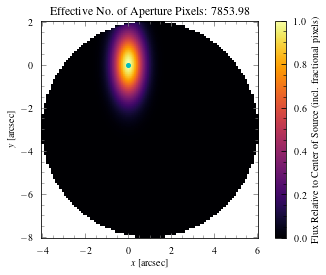

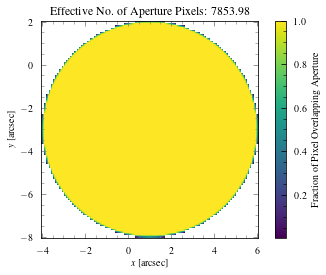

Time (s) required to reach SNR=10 in uv-band 33.49114766425763
SNR achieved in t=33.49114766425763 seconds in uv-band 10.0

Time (s) required to reach SNR=10 in u-band 14.064242985854644
SNR achieved in t=14.064242985854644 seconds in u-band 10.0

Time (s) required to reach SNR=10 in g-band 3.398950621718115
SNR achieved in t=3.398950621718115 seconds in g-band 10.000000000000004



In [7]:
importlib.reload(phot)
# %matplotlib widget
import matplotlib as mpl

#
# Define telescope instance
#
MyTelescope = Telescope(passband_resolution=1 << u.AA)
#
# Generate background object
#
MyBackground = Background(mags_per_sq_arcsec={"uv": 26.08, "u": 23.74, "g": 22.60})
MyBackground.add_geocoronal_emission(flux="avg")
#
# Create source
#
# flux_profile = Profiles.sersic(r_eff=2 * u.arcsec, n=1, e=0.4, angle=0)
MySource = ExtendedSource(
    angle_a=3 * u.arcsec, angle_b=1 * u.arcsec, rotation=90, profile="exponential", exponential_scale_lengths=[1.5, 0.7] << u.arcsec
    # angle_a=3 * u.arcsec, angle_b=1 * u.arcsec, rotation=45, profile="uniform"
)
# MySource = GalaxySource(r_eff=2*u.arcsec, n=1, angle_a=3 * u.arcsec, angle_b=2.8 * u.arcsec, rotation=90)
# MySource = GalaxySource(r_eff=2*u.arcsec, n=1, angle_a=2 * u.arcsec, angle_b=1.8 * u.arcsec, rotation=90)
#
# Renormalize & apply redshift
#
MySource.use_galaxy_spectrum(gal_type="spiral")
MySource.norm_luminosity_dist(luminosity=1.4e9, dist=58.3 * u.Mpc)  # (solar luminosities)
MySource.redshift_wavelengths(0.06)
print("Source AB mags", MySource.get_AB_mag(MyTelescope))
print("Source bolometric AB mag", MySource.get_AB_mag())
#
# Specify photometry aperture
#
MyPhot = phot.Photometry(MyTelescope, MySource, MyBackground)
MyPhot.use_elliptical_aperture(
    # a=2 * u.arcsec, b=2 * u.arcsec, center=[-2, -2] * u.arcsec, rotation=90
    a=5 * u.arcsec,
    b=5 * u.arcsec,
    center=[1, -3] * u.arcsec,
    rotation=0
    # a=2 * u.arcsec, b=1 * u.arcsec, center=[-2, -1] * u.arcsec, rotation=0
)
# MyPhot.use_rectangular_aperture(width=2.12 * u.arcsec, length=1.8 * u.arcsec, center=[0, 0] * u.arcsec)
#
# Visualize aperture
#
# MyPhot.show_source_weights(mark_source=False, norm=mpl.colors.LogNorm())
MyPhot.show_source_weights(mark_source=True)
MyPhot.show_aper_weights(plot=True)

TARGET_SNR = 10
REDDENING = 0.01

# (For prettier printing)
for band in MyTelescope.passbands:
    time = MyPhot.calc_snr_or_t(snr=TARGET_SNR, reddening=REDDENING)[band]
    print(f"Time (s) required to reach SNR={TARGET_SNR} in {band}-band", time)
    snr = MyPhot.calc_snr_or_t(t=time, reddening=REDDENING)[band]
    print(f"SNR achieved in t={time} seconds in {band}-band", snr)
    print()


Source AB mags {'uv': 18.838903364745583, 'u': 17.965353701283554, 'g': 16.693436264225703}
Source bolometric AB mag 16.539338823566105


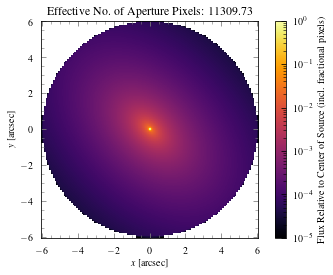

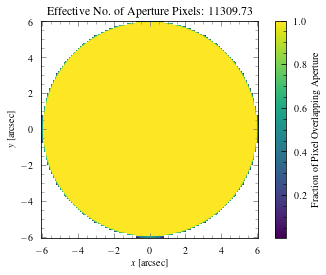

Time (s) required to reach SNR=10 in uv-band 66484.60998562457
SNR achieved in t=66484.60998562457 seconds in uv-band 9.999999999999998

Time (s) required to reach SNR=10 in u-band 34688.9126848438
SNR achieved in t=34688.9126848438 seconds in u-band 10.000000000000004

Time (s) required to reach SNR=10 in g-band 7374.953589521828
SNR achieved in t=7374.953589521828 seconds in g-band 9.999999999999998



In [8]:
importlib.reload(phot)
# %matplotlib widget
import matplotlib as mpl
#
# Define telescope instance
#
MyTelescope = Telescope(passband_resolution=1 << u.AA)
#
# Generate background object
#
MyBackground = Background(mags_per_sq_arcsec={"uv": 26.08, "u": 23.74, "g": 22.60})
MyBackground.add_geocoronal_emission(flux="avg")
#
# Create source
#
# flux_profile = Profiles.sersic(r_eff=2 * u.arcsec, n=1, e=0.4, angle=0)
MySource = GalaxySource(r_eff=3*u.arcsec, n=4, angle_a=3 * u.arcsec, angle_b=2.8 * u.arcsec, rotation=135)
# MySource = GalaxySource(r_eff=2*u.arcsec, n=1, angle_a=2 * u.arcsec, angle_b=1.8 * u.arcsec, rotation=90)
#
# Renormalize & apply redshift
#
MySource.use_galaxy_spectrum(gal_type="spiral")
MySource.norm_luminosity_dist(luminosity=1.4e9, dist=58.3 * u.Mpc)  # (solar luminosities)
MySource.redshift_wavelengths(0.06)
print("Source AB mags", MySource.get_AB_mag(MyTelescope))
print("Source bolometric AB mag", MySource.get_AB_mag())
#
# Specify photometry aperture
#
MyPhot = phot.Photometry(MyTelescope, MySource, MyBackground)
MyPhot.use_elliptical_aperture(
    # a=2 * u.arcsec, b=2 * u.arcsec, center=[-2, -2] * u.arcsec, rotation=90
    a=6 * u.arcsec, b=6 * u.arcsec, center=[0, 0] * u.arcsec, rotation=0
    # a=2 * u.arcsec, b=1 * u.arcsec, center=[-2, -1] * u.arcsec, rotation=12
)
# MyPhot.use_rectangular_aperture(width=2.12 * u.arcsec, length=1.8 * u.arcsec, center=[0, 0] * u.arcsec)
#
# Visualize aperture
#
MyPhot.show_source_weights(mark_source=False, norm=mpl.colors.LogNorm(vmin=1e-5, vmax=1))
# MyPhot.show_source_weights(mark_source=False)
MyPhot.show_aper_weights(plot=True)

TARGET_SNR = 10
REDDENING = 0.01

# (For prettier printing)
for band in MyTelescope.passbands:
    time = MyPhot.calc_snr_or_t(snr=TARGET_SNR, reddening=REDDENING)[band]
    print(f"Time (s) required to reach SNR={TARGET_SNR} in {band}-band", time)
    snr = MyPhot.calc_snr_or_t(t=time, reddening=REDDENING)[band]
    print(f"SNR achieved in t={time} seconds in {band}-band", snr)
    print()
